This notebook just show some manipulations we can done on images. Let's discover

# Image histogram

Image histogram is a graph that figures out every pixels we have in one image and the number of times they are present.

Firstly we hav to import image.

In [ ]:
from matplotlib.pyplot import imshow, get_cmap
from skimage import exposure
from skimage.color import rgb2gray
import numpy as np
import cv2
from skimage import morphology

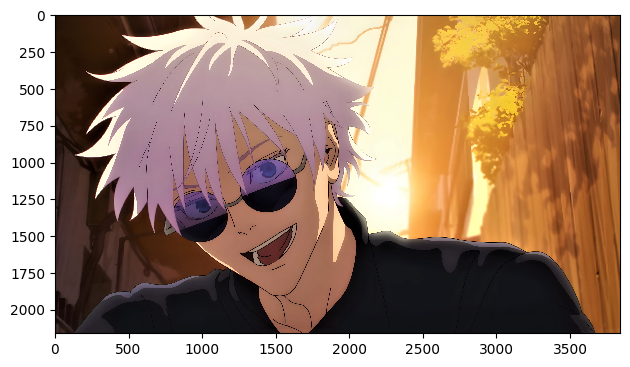

In [ ]:
#Now, let's read an image
image1= imread("/content/satoru-gojo-8k-3840x2160-15315.jpg")
imshow(image1)

We can display this in grayscale by two ways

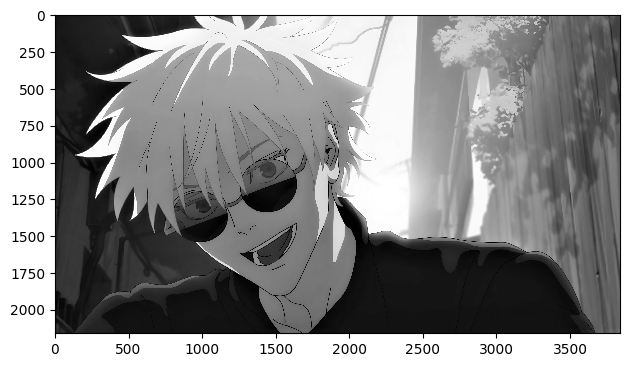

In [ ]:
#Fist way

image1_gray= imread("/content/satoru-gojo-8k-3840x2160-15315.jpg", as_gray=True)
imshow(image1_gray)

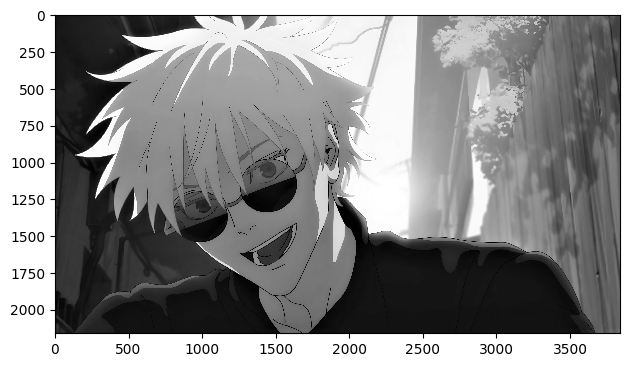

In [ ]:
#Second way

image= rgb2gray(image1)
imshow(image)

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


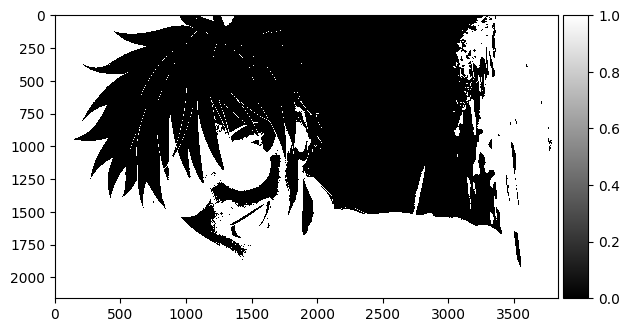

In [ ]:
#If you want to dsiplay this in black and white.

im = np.where(image1_gray>128/256, 0, 1)
imshow(im, cmap=plt.get_cmap('gray'))

Now, let's draw an histogram with scikit_learn :

Text(0.5, 1.0, 'Histogram of a grayscale image')

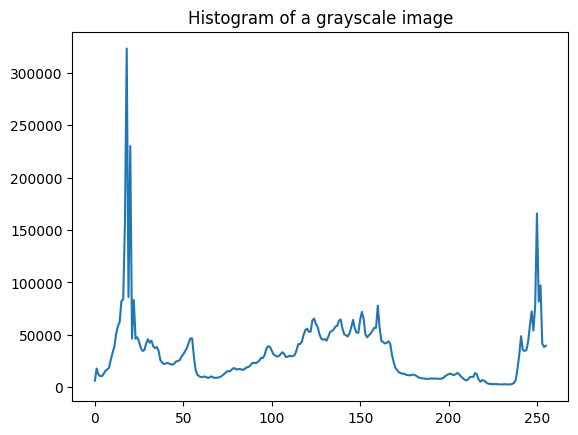

In [ ]:
#On grayscale image
hist = exposure.histogram(image1_gray)
plt.plot(hist[0])
plt.title("Histogram of a grayscale image")

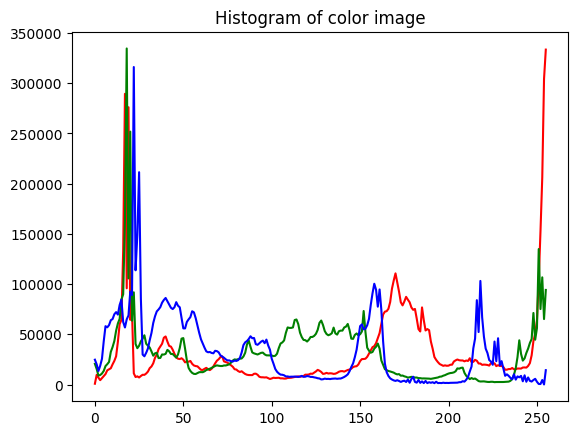

In [ ]:
#on color image
rgbcolors = ['red', 'green', 'blue']

for i, color in enumerate(rgbcolors):
            plt.plot(exposure.histogram(image1[...,i])[0], color=color)
            plt.title("Histogram of color image")


With openCV

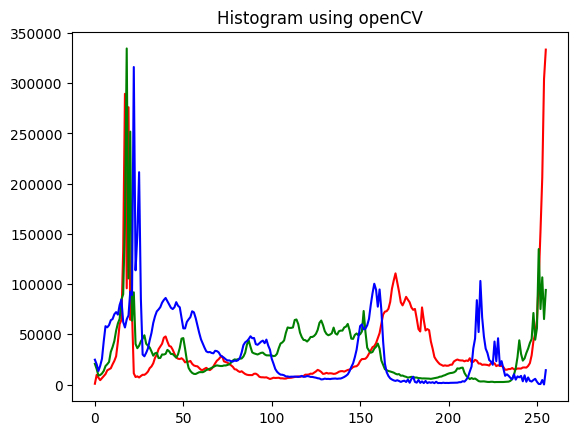

In [ ]:
rgbcolors = ['r', 'g', 'b']

for i,col in enumerate(rgbcolors):

        histr = cv2.calcHist([image1],[i],None,[256],[0,256])
        plt.plot(histr, color = col)
        plt.title("Histogram using openCV")

# Global statistics

In [ ]:
import pandas as pd

In [ ]:
def stats(image):
    colors = []
    for i in range(0, 3):
        max_color =np.max(image[:,:,i])
        min_color =np.min(image[:,:,i])
        mean_color = np.mean(image[:,:,i])
        median_color = np.median(image[:,:,i])
        row = (min_color, max_color, mean_color, median_color)
        colors.append(row)

    return pd.DataFrame(colors,
                        index = ['Red', ' Green', 'Blue'],
                        columns = ['Min', 'Max', 'Mean', 'Median'])
stats(image1)

,Min,Max,Mean,Median
Red,0,255,143.340751,168.0
Green,0,255,108.351096,110.0
Blue,0,255,84.796727,57.0


# Binary thresholding on the mean

In [ ]:
from skimage.filters import threshold_mean, threshold_otsu

Text(0.5, 1.0, 'Mean thresolded')

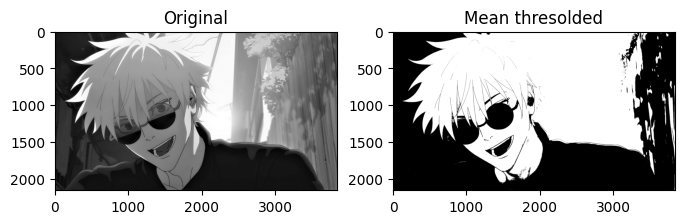

In [ ]:
  thresh = threshold_mean(image1_gray)

  binary = image > thresh
  fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
  ax = axes.ravel()
  ax[0].imshow (image, cmap=plt.cm.gray)
  ax[0].set_title('Original')
  ax[1].imshow(binary, cmap=plt.cm.gray)
  ax[1].set_title('Mean thresolded' )



# Otsu Threshold

Text(0.5, 1.0, 'Otsu thresolded')

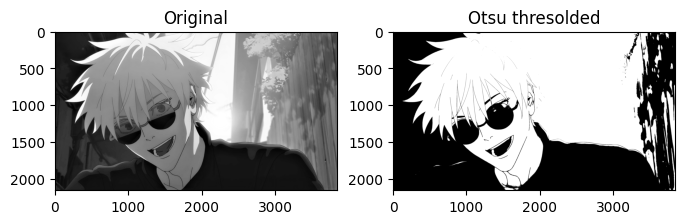

In [ ]:
thresh = threshold_otsu(image1_gray)
binary = image > thresh
fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
ax = axes.ravel()
ax[0].imshow (image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Otsu thresolded' )



# Thresholding of color images

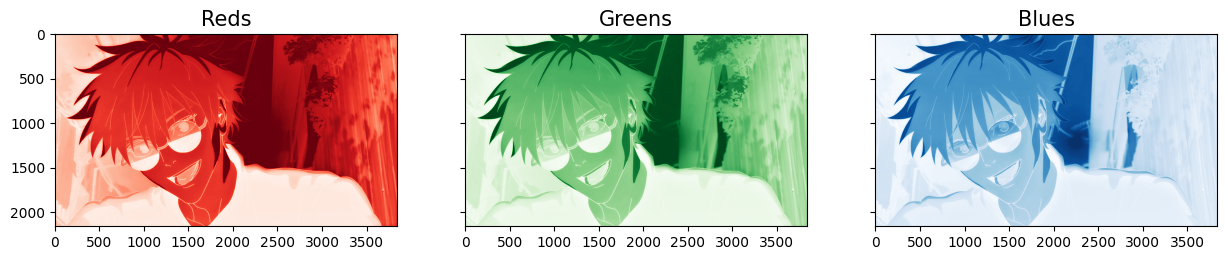

In [ ]:
rgb = ['Reds','Greens','Blues']

_, axes = plt.subplots(1, 3, figsize=(15,5), sharey = True)
for i in range(3):
   axes[i].imshow(image1[:,:,i], cmap = rgb[i])
   axes[i].set_title(rgb[i], fontsize = 15)

# Transformations

## Rotation

In [ ]:
from skimage import exposure, transform

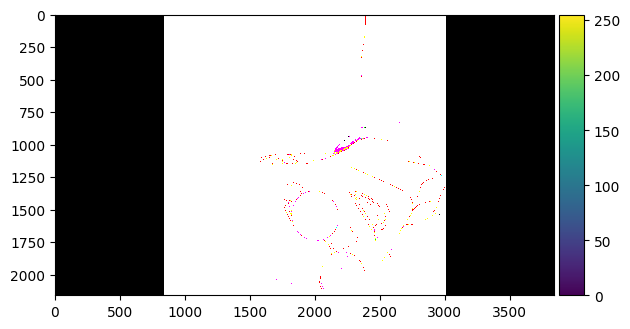

In [ ]:
rotated = transform.rotate(image1, angle=90, preserve_range=True)
imshow(rotated)

## Size change

In [ ]:
resized_img = transform.resize(image=image1, output_shape=(6,6), preserve_range=True)

In [ ]:
resized_img.shape

(6, 6, 3)

## Convolution with python


In [ ]:
import numpy as np
from skimage import data
import matplotlib as plt
from scipy import signal
from matplotlib.pyplot import imshow, get_cmap
import matplotlib.pyplot as plt


In [ ]:

def displayTwoBaWImages(img1, img2):
  _, axes = plt.subplots(ncols=2)
  axes[0].imshow(img1, cmap=plt.get_cmap('gray'))
  axes[1].imshow(img2, cmap=plt.get_cmap('gray'))

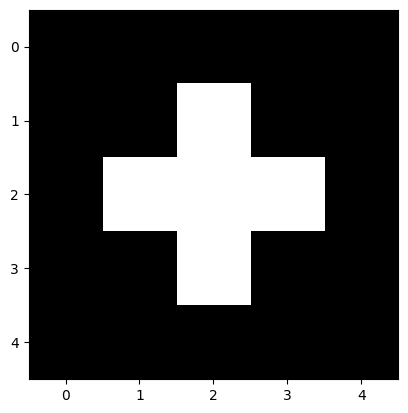

In [ ]:
#Image
image_test = np.array([[0,0,0,0,0],
                       [0,0,1,0,0],
                       [0,1,1,1,0],
                       [0,0,1,0,0],
                       [0,0,0,0,0]])
imshow(image_test,
       cmap=get_cmap('gray'))

In [ ]:
#kernel
kernel = np.ones((3,3), np.float32)/2

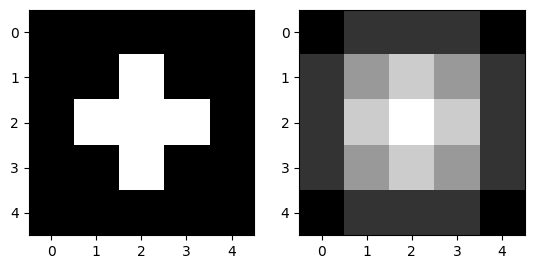

In [ ]:
imgconvol = signal.convolve2d(image_test,
                              kernel,
                              mode='same',
                              boundary='fill',
                              fillvalue=0)
displayTwoBaWImages(image_test, imgconvol)

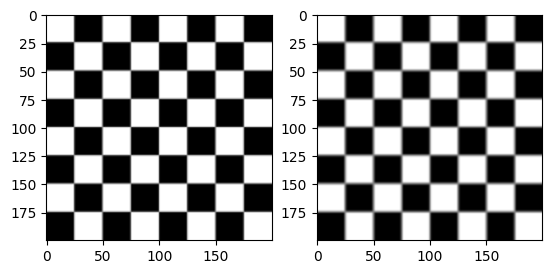

In [ ]:
#blurring

kernel = np.array([[0,0,0,0,0],
                    [0,1,1,1,0],
                    [0,1,1,1,0],
                    [0,1,1,1,0],
                    [0,0,0,0,0]])
img = signal.convolve2d(data.checkerboard(),
                        kernel,
                        boundary='symm',
                        mode='same')
displayTwoBaWImages(data.checkerboard(), img)